In [2]:
#Loading all libraries and methods used here
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.optimize import curve_fit, fsolve, differential_evolution, minimize
import scipy.special as ss
from timeit import default_timer as timer

#from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import Audio, display

def allDone():
    display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))
    return

In [3]:
'''def aux(x, m, b):
    return m*x+b
def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, aux(x,m,b))
    plt.ylim(-5, 5)
    plt.show() 

interact(f, m=(-2.0, 2.0), b=(-3, 3, 0.5));
'''

'def aux(x, m, b):\n    return m*x+b\ndef f(m, b):\n    plt.figure(2)\n    x = np.linspace(-10, 10, num=1000)\n    plt.plot(x, aux(x,m,b))\n    plt.ylim(-5, 5)\n    plt.show() \n\ninteract(f, m=(-2.0, 2.0), b=(-3, 3, 0.5));\n'

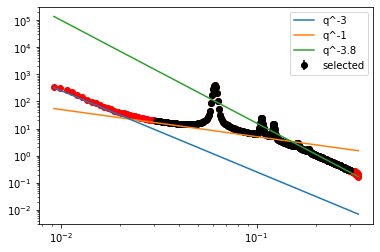

In [4]:
#importing data

source_directory_RDS_files = './'
source_directory_results = './RESULTADOS/'
file_path = './G.RDS'

file_name = file_path[2:len(file_path)-4]

exp_data = np.loadtxt(file_path, skiprows = 3)


#q in angstrons-1.
q_exp = exp_data[:,0]

#intesity.
I_exp = exp_data[:,1]

#errors
errI_exp = exp_data[:,2]

#interval selection
q_min = 0.03
q_max = 0.3
i = 0
q_selected = []
I_selected = []
errI_selected = []
while i<len(q_exp):
    if (q_exp[i]>q_min and q_exp[i]<q_max):
        q_selected.append(q_exp[i])
        I_selected.append(I_exp[i])
        errI_selected.append(errI_exp[i])
    i = i + 1  
    
q_selected = np.asarray(q_selected)
I_selected = np.asarray(I_selected)
errI_selected = np.asarray(errI_selected)
    
plt.errorbar(q_exp,I_exp,yerr=errI_exp, fmt='ro')
plt.errorbar(q_selected,I_selected,yerr=errI_selected, fmt='ko', label='selected')
plt.plot(q_exp, 2.5e-4*q_exp**(-3), zorder=10, label='q^-3')
plt.plot(q_exp, 5.0e-1*q_exp**(-1), zorder=5, label='q^-1')
plt.plot(q_exp, 2.5e-3*q_exp**(-3.8), zorder=5, label='q^-3.8')
plt.xscale('log')
plt.yscale('log')
plt.legend()

#saving cutted file in results folder
np.savetxt(source_directory_results + file_name + '.cut', np.c_[q_selected, I_selected, errI_selected])

For hexagonal symmetries, the diffraction peaks were predicted to be at the following positions (Garcia2016):

$$\left( \frac{q_{hkl}}{2\pi} \right)^2=\frac{4}{3} \left( \frac{h^2+hk+k^2}{a^2} \right)+\frac{l^2}{c^2}$$

where $h$, $k$ and $l$ are the Miller indices, and $a$ is the lattice parameter. For 2D hexagonal simetries, like SBA-15, $l=0$, then the previous equation becomes:

$$q_{hk}=\frac{4\pi}{a}\sqrt{\frac{h^2+hk+k^2}{3}}$$


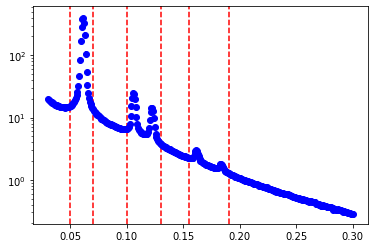

In [5]:
#filtering to reduce the amount of data
plt.errorbar(q_selected,I_selected,yerr=errI_selected, fmt='bo')
plt.yscale('log')

v01 = 0.05
plt.axvline(x=v01, color='red', linestyle='--')
v02 = 0.07
plt.axvline(x=v02, color='red', linestyle='--')
v03 = 0.10
plt.axvline(x=v03, color='red', linestyle='--')
v04 = 0.13
plt.axvline(x=v04, color='red', linestyle='--')
v05 = 0.155
plt.axvline(x=v05, color='red', linestyle='--')
v06 = 0.19
plt.axvline(x=v06, color='red', linestyle='--')

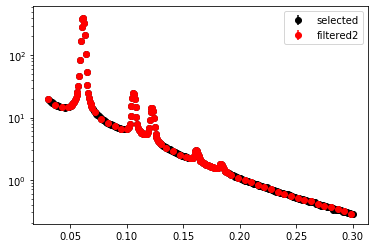

In [6]:
i = 0
q_filtered = []
I_filtered = []
errI_filtered = []
while i<len(q_selected):
    if q_selected[i]<v01:
        if i % 2 == 0:
            q_filtered.append(q_selected[i])
            I_filtered.append(I_selected[i])
            errI_filtered.append(errI_selected[i])
    elif q_selected[i]<v02:
        q_filtered.append(q_selected[i])
        I_filtered.append(I_selected[i])
        errI_filtered.append(errI_selected[i])
    elif q_selected[i]<v03:
        if i % 2 == 0:
            q_filtered.append(q_selected[i])
            I_filtered.append(I_selected[i])
            errI_filtered.append(errI_selected[i])
    elif q_selected[i]<v04:
        q_filtered.append(q_selected[i])
        I_filtered.append(I_selected[i])
        errI_filtered.append(errI_selected[i])
    elif q_selected[i]<v05:
        if i % 2 == 0:
            q_filtered.append(q_selected[i])
            I_filtered.append(I_selected[i])
            errI_filtered.append(errI_selected[i])
    elif q_selected[i]<v06:
        q_filtered.append(q_selected[i])
        I_filtered.append(I_selected[i])
        errI_filtered.append(errI_selected[i])
    else:
        if i % 2 == 0:
            q_filtered.append(q_selected[i])
            I_filtered.append(I_selected[i])
            errI_filtered.append(errI_selected[i])
    
    i = i + 1  
    
q_filtered = np.asarray(q_filtered)
I_filtered = np.asarray(I_filtered)
errI_filtered = np.asarray(errI_filtered)



#double filtering
i = 0
q_filtered2 = []
I_filtered2 = []
errI_filtered2 = []
while i<len(q_filtered):
    if q_filtered[i]<v01:
        if i % 2 == 0:
            q_filtered2.append(q_filtered[i])
            I_filtered2.append(I_filtered[i])
            errI_filtered2.append(errI_filtered[i])
    elif q_filtered[i]<v02:
        q_filtered2.append(q_filtered[i])
        I_filtered2.append(I_filtered[i])
        errI_filtered2.append(errI_filtered[i])
    elif q_filtered[i]<v03:
        if i % 2 == 0:
            q_filtered2.append(q_filtered[i])
            I_filtered2.append(I_filtered[i])
            errI_filtered2.append(errI_filtered[i])
    elif q_filtered[i]<v04:
        q_filtered2.append(q_filtered[i])
        I_filtered2.append(I_filtered[i])
        errI_filtered2.append(errI_filtered[i])
    elif q_filtered[i]<v05:
        if i % 2 == 0:
            q_filtered2.append(q_filtered[i])
            I_filtered2.append(I_filtered[i])
            errI_filtered2.append(errI_filtered[i])
    elif q_filtered[i]<v06:
        q_filtered2.append(q_filtered[i])
        I_filtered2.append(I_filtered[i])
        errI_filtered2.append(errI_filtered[i])
    else:
        if i % 2 == 0:
            q_filtered2.append(q_filtered[i])
            I_filtered2.append(I_filtered[i])
            errI_filtered2.append(errI_filtered[i])
    
    i = i + 1  
    
q_filtered2 = np.asarray(q_filtered2)
I_filtered2 = np.asarray(I_filtered2)
errI_filtered2 = np.asarray(errI_filtered2)


#triple filtering
i = 0
q_filtered3 = []
I_filtered3 = []
errI_filtered3 = []
while i<len(q_filtered2):
    if q_filtered2[i]<v01:
        if i % 2 == 0:
            q_filtered3.append(q_filtered2[i])
            I_filtered3.append(I_filtered2[i])
            errI_filtered3.append(errI_filtered2[i])
    elif q_filtered2[i]<v02:
        q_filtered3.append(q_filtered2[i])
        I_filtered3.append(I_filtered2[i])
        errI_filtered3.append(errI_filtered2[i])
    elif q_filtered2[i]<v03:
        if i % 2 == 0:
            q_filtered3.append(q_filtered2[i])
            I_filtered3.append(I_filtered2[i])
            errI_filtered3.append(errI_filtered2[i])
    elif q_filtered2[i]<v04:
        q_filtered3.append(q_filtered2[i])
        I_filtered3.append(I_filtered2[i])
        errI_filtered3.append(errI_filtered2[i])
    elif q_filtered2[i]<v05:
        if i % 2 == 0:
            q_filtered3.append(q_filtered2[i])
            I_filtered3.append(I_filtered2[i])
            errI_filtered3.append(errI_filtered2[i])
    elif q_filtered2[i]<v06:
        q_filtered3.append(q_filtered2[i])
        I_filtered3.append(I_filtered2[i])
        errI_filtered3.append(errI_filtered2[i])
    else:
        if i % 2 == 0:
            q_filtered3.append(q_filtered2[i])
            I_filtered3.append(I_filtered2[i])
            errI_filtered3.append(errI_filtered2[i])
    
    i = i + 1  
    
q_filtered3 = np.asarray(q_filtered3)
I_filtered3 = np.asarray(I_filtered3)
errI_filtered3 = np.asarray(errI_filtered3)


plt.errorbar(q_selected,I_selected,yerr=errI_selected, fmt='ko', label='selected')
plt.errorbar(q_filtered3,I_filtered3,yerr=errI_filtered3, fmt='ro', label='filtered2')
#plt.xscale('log')
plt.yscale('log')
plt.legend()

In [7]:
len(q_filtered2)

177

The net parameter a is:  118.54897805452406  angstrons


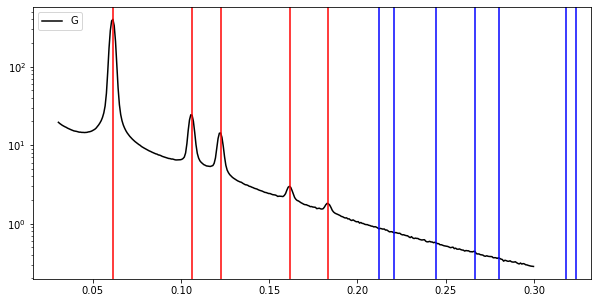

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(q_selected,I_selected, 'k', label = file_name)
plt.yscale('log')
#plt.xscale('log')
plt.legend()

q_00 = 0.0612
plt.axvline(x=np.sqrt(1.0)*q_00, color='r') #100
plt.axvline(x=np.sqrt(3.0)*q_00, color = 'r') #110
plt.axvline(x=np.sqrt(4.0)*q_00, color = 'r') #200
plt.axvline(x=np.sqrt(7.0)*q_00, color = 'r') #210
plt.axvline(x=np.sqrt(9.0)*q_00, color = 'r') #300
plt.axvline(x=np.sqrt(12.0)*q_00, color = 'b') #220
plt.axvline(x=np.sqrt(13.0)*q_00, color = 'b') #310
plt.axvline(x=np.sqrt(16.0)*q_00, color = 'b') #400
plt.axvline(x=np.sqrt(19.0)*q_00, color = 'b') #320
plt.axvline(x=np.sqrt(21.0)*q_00, color = 'b') #410
plt.axvline(x=np.sqrt(27.0)*q_00, color = 'b') #330
plt.axvline(x=np.sqrt(28.0)*q_00, color = 'b') #420

a_net = 4.0*np.pi/(q_00*np.sqrt(3.0))
#plt.plot(q_selected, 0.0025*q_selected**(-4))
#plt.plot(q_selected, 2.0*q_selected**(-1))
#q_01 = 0.07
#plt.axvline(x=q_01, color='g')
#plt.axvline(x=2*q_01, color = 'g')
#plt.axvline(x=3*q_01, color = 'g')
#plt.axvline(x=4*q_01, color = 'g')
print('The net parameter a is: ', a_net, ' angstrons')

The SBA-15 model is formed by core-shell cylinders arranged in a 2D hexagonal simetry. This system is taken to be a "two-phase system", i.e., polydisperse particles ("phase 1"), with electron density $\rho_1$ and volume fraction $\phi_1$, in a matrix ("phase 2") of electron density $\rho_2$ and volume fraction $\phi_2=1-\phi_1$ separated by sharp interfaces (Sundblom2009). Then, the scattering cross-section per unit of volume is described by:
$$\frac{d\sigma(q)}{d\Omega}=(\rho_1-\rho_2)^2n_d \langle A(q) \rangle^2[1+\beta(q)(\langle Z(q) \rangle-1)]$$ 

Since $\beta(q)=\frac{\langle A(q) \rangle ^2}{\langle A(q)^2 \rangle}$, the previous equation could be written as:

$$\frac{d\sigma(q)}{d\Omega}=(\rho_1-\rho_2)^2n_d [\langle A(q)^2 \rangle + \langle A(q)\rangle^2(\langle Z(q) \rangle-1)]$$ 

The angular brackets $\langle \dots \rangle$ denote an average with respect to the particle size distribution and the spatial distribution of particles. Here we will assume both distributions independent. Also, this *decoupling aproximation*, which allow us to factorize the scattering intensity into form factor and structure factor product, is not valid for very polydisperse systems. 
The parameter $n_d$ is the number density of the particles, $\langle A(q)^2 \rangle$ is the form factor, related to the particle shape, usually denoted by $P(q)$, whereas the structure factor $S(q)=1+\beta(q)(\langle Z(q) \rangle-1)$ contains informaton about the lattice structure.
The form factor in this case can be expressed analytically by a core-shell cylinder form factor:

$$P_{cyl-cs}(q)=\int_{0}^{\pi/2}\left[ A_{cyl-cs}\right]^2\sin \alpha d\alpha$$

where:

$$F_{cyl-cs}(q)=\Delta\rho_{shell}\cdot V(R_{out},L)\cdot A_{cyl}(q,R_{out}, L, \alpha)-(\Delta\rho_{shell}-\Delta\rho_{core})\cdot V(R_{core},L)\cdot A_{cyl}(q,R_{core}, L, \alpha)$$

$$V(R, L)=\pi R^2L$$

$$A_{cyl}(q,R,L,\alpha)=\frac{2 J_1(qR\sin\alpha)}{qR\sin\alpha}\frac{\sin(0.5 qL\cos\alpha)}{0.5 qL\cos\alpha}$$

being $J_1$ the first-order Bessel function of the first kind. For fitting purposes, it is possible rewrite the $F_{cyl-sc}$ in a more convenient way:

$$F_{cyl-cs}(q)=\Delta\rho_{shell}\cdot V(R_{out},L)\cdot \left[ A_{cyl}(q,R_{out}, L, \alpha)-\left(1-\frac{\Delta\rho_{core}}{\Delta\rho_{shell}}\right)\cdot \left(\frac{R_{core}}{R_{out}}\right)^2\cdot A_{cyl}(q,R_{core}, L, \alpha)\right]$$

The factor $\Delta\rho_{shell}\cdot V(R_{out},L)$ will be later included in a generic scale factor, whereas we will call $\left(1-\frac{\Delta\rho_{core}}{\Delta\rho_{shell}}\right)$ simply as $B$. Then, for all fitting purposes, the final expression for $F_{cyl-cs}(q)$ becomes:

$$F_{cyl-cs}(q)= A_{cyl}(q,R_{out}, L, \alpha)-B\cdot \left(\frac{R_{core}}{R_{out}}\right)^2\cdot A_{cyl}(q,R_{core}, L, \alpha)$$

In [9]:
#core-shell cylinder form factor

def integration_1D(f, a, b, n):
    #calculates the integral of f(x) in an interval [a,b] using midpoint strategy with n points/subintervals
    hx = float(b-a)/n
    x = np.linspace(a + hx/2, b - hx/2, n)
    return hx*np.sum(f(x))

def V_cyl(R,L):
    #calculates the cylinder volume
    return np.pi*R**2*L

def A_cyl(q_value, R, L, alpha):
    #calculates the amplitude form factor for a cylinder F_cyl(q)
    
    A = q_value*R*np.sin(alpha)
    B = 0.5*q_value*L*np.cos(alpha)
    
    return 2.0*ss.jv(1,A)*np.sin(B)/(A*B)

def A_cyl_cs(q_value, R_core, R_out, L, B, alpha):
    return A_cyl(q_value, R_out, L, alpha)-B*(R_core/R_out)**2*A_cyl(q_value, R_core, L, alpha)

def P_cyl_cs(q_value, R_core, R_out, L, B):
    integrand = lambda alpha: (A_cyl_cs(q_value, R_core, R_out, L, B, alpha))**2*np.sin(alpha)
    
    return integration_1D(integrand,0.0,0.5*np.pi,200)

def P_cyl_cs_values(q_values, R_core, R_out, L, B):
    P_values = []
    for q in q_values:
        P_values.append(P_cyl_cs(q, R_core, R_out, L, B))
    return np.asarray(P_values)

In [10]:
'''plt.plot(q_selected, P_cyl_cs_values(q_selected, 40.0, 50.0, 5000.0, 1.0), label='cs cylinder')
plt.yscale('log')
plt.xscale('log')
plt.legend()

#%timeit (P_cyl_cs_values(q_selected, 40.0, 50.0, 5000.0, 1.0))'''

"plt.plot(q_selected, P_cyl_cs_values(q_selected, 40.0, 50.0, 5000.0, 1.0), label='cs cylinder')\nplt.yscale('log')\nplt.xscale('log')\nplt.legend()\n\n#%timeit (P_cyl_cs_values(q_selected, 40.0, 50.0, 5000.0, 1.0))"

If the cylinder is long, i.e, $L>>R$, then $P_{cyl-cs}$ may be approximated as a product of the longitudinal factor, parallel to the cylinder axis, $P_{cyl-cs\parallel}(q)$, and the cross-section particle contribution, $P_{cyl-cs\perp}(q)$, i.e., 

$$P_{cyl-cs}(q)\cong P_{cyl-cs\parallel}(q)\cdot P_{cyl-cs\perp}(q)$$

where:

$$P_{cyl-cs\parallel}(q)=\frac{Si(qL)}{0.5qL}-\left[\frac{\sin(0.5qL)}{(0.5qL)}\right]^2$$

$$Si(x)=\int_{0}^{x}\frac{\sin t}{t} dt$$

$$P_{cyl-cs\perp}(q)=[\Delta\rho_{shell}\cdot V(R_{out},L)\cdot A_{cyl-\perp}(q,R_{out})-(\Delta\rho_{shell}-\Delta\rho_{core})\cdot V(R_{core},L)\cdot A_{cyl-\perp}(q,R_{core})]^2$$

$$A_{cyl-\perp}(q,R)=\frac{2J_1(qR)}{qR}$$

Doing the same thing as before for $P_{cyl-cs\perp}(q)$, for fitting purposes it matters:

$$P_{cyl-cs\perp}(q)=\left[A_{cyl-\perp}(q,R_{out}) -B \cdot \left ( \frac{R_{core}}{R_{out}}\right ) ^2 \cdot A_{cyl-\perp}(q,R_{core})\right]^2$$

In [11]:
#long core-shell cylinder form factor

def P_cyl_cs_parallel(q_value, L):
    #ss.sici(x)[0] calculates the sine integral function of x
    #ss.sici(x)[1] calculates the cosine integral function of x
    
    Aux1 = q_value*L
    Aux2 = 0.5*Aux1
    
    return ss.sici(Aux1)[0]/Aux2 - (np.sin(Aux2)/Aux2)**2
    
    
def A_cyl_perp(q_value,R):
    Aux = q_value*R
    #ss.jv(1,x): Bessel function of the first kind of first order of x (could be float or complex)
    return 2.0*ss.jv(1,Aux)/Aux

def P_cyl_cs_perp(q_value, R_core, R_out, B):
    return (A_cyl_perp(q_value,R_out)-B*(R_core/R_out)**2*A_cyl_perp(q_value,R_core))**2

def P_cyl_cs_approx(q_value, R_core, R_out, L, B):
    return P_cyl_cs_parallel(q_value, L)*P_cyl_cs_perp(q_value, R_core, R_out, B)

def P_cyl_cs_approx_values(q_values, R_core, R_out, L, B):
    P_values = []
    for q in q_values:
        P_values.append(P_cyl_cs_approx(q, R_core, R_out, L, B))
    return np.asarray(P_values)

In [12]:
'''plt.plot(q_selected, P_cyl_cs_approx_values(q_selected, 40.0, 50.0, 1000.0, 1.0), label='cs cylinder approx')
plt.plot(q_selected, P_cyl_cs_values(q_selected, 40.0, 50.0, 1000.0, 1.0), label='cs cylinder')
plt.yscale('log')
plt.xscale('log')
plt.legend()

#print('cylinder time')
#%timeit (P_cyl_cs_values(q_selected, 40.0, 50.0, 1000.0, 1.0))

#print('cylinder approx time')
#%timeit (P_cyl_cs_approx_values(q_selected, 40.0, 50.0, 1000.0, 1.0))
'''

"plt.plot(q_selected, P_cyl_cs_approx_values(q_selected, 40.0, 50.0, 1000.0, 1.0), label='cs cylinder approx')\nplt.plot(q_selected, P_cyl_cs_values(q_selected, 40.0, 50.0, 1000.0, 1.0), label='cs cylinder')\nplt.yscale('log')\nplt.xscale('log')\nplt.legend()\n\n#print('cylinder time')\n#%timeit (P_cyl_cs_values(q_selected, 40.0, 50.0, 1000.0, 1.0))\n\n#print('cylinder approx time')\n#%timeit (P_cyl_cs_approx_values(q_selected, 40.0, 50.0, 1000.0, 1.0))\n"

As we see above, the use of the approximation for the long cylinder can save us a lot of time. But, instead $L=5000$, as done in Sundblom2009 and later publications, we can use $L=1000$, because with $L=5000$, there are discrepancies at high $q$.

We can make the form factor more realistic. We may then introduce:
* Smeared interfaces
* Polydispersity

Smear the interfaces mean multiply the terms in the amplitude form factor functions $F(q)$ by $\exp(-0.5q^2\sigma^2)$. The polidispersity can be included by any size distribution. In Sundblom2009, it was used a schultz-zimm distribution, since it can be simetric or assimetric. This is a good feature, but its mathematical formula has some pratical problems related to divergence. On the other hand, lognormal distribution is more well behaviored.

For smearing, let's introduce the factor $\exp(-0.5q^2\sigma^2)$ into $P_{cyl-cs\perp}(q)$:

$$P_{cyl-cs\perp}(q)=\left[A_{cyl-\perp}(q,R_{out})\cdot e^{-0.5q^2\sigma_{out}^2} -B \cdot \left ( \frac{R_{core}}{R_{out}}\right ) ^2 \cdot A_{cyl-\perp}(q,R_{core})\cdot e^{-0.5q^2\sigma_{core}^2}\right]^2$$

Differently from Sundblom2009, here we introduce two interfacial smearings: for the outer part of the cylinder, but also for the internal part.

In [13]:
def smear(q,sig):
    return np.exp(-0.5*(q*sig)**2)

def P_cyl_cs_perp_smear(q_value, R_core, R_out, B, sig_out, sig_core):
    return (A_cyl_perp(q_value,R_out)*smear(q_value,sig_out)-B*(R_core/R_out)**2*A_cyl_perp(q_value,R_core)*smear(q_value,sig_core))**2

Now, let's introduce the polidisperity by means of lognormal distribution. For a given $X$ random variable that follows a lognormal distribution with mean $\theta$ and standard deviation $\omega$, i.e., $X\sim \Lambda(\theta,\omega)$, then the probability density function, $f(X)$, is written as:

$$f(X)=\frac{1}{X\omega\sqrt{2\pi}}\exp\left[-0.5\left(\frac{\ln X-\theta}{\omega}\right)^2\right]$$

Note that $\theta$ and $\omega$ are parameters of the lognormal distribution, not the *average* and *standard deviation* of $X$. But, having $\theta$ and $\omega$, the expectation of X and its standard deviation are given by:
$$E(X)=\mu=\exp\left(\theta+0.5\omega^2\right)$$
$$\sqrt{V(X)}=\sigma=\sqrt{\exp(2\theta+\omega^2)\cdot[\exp(\omega^2)-1]}$$

To work directly with $\mu$ and $\sigma$ as fitting parameters, it is interesting invert the previous expressions:
$$\theta = \ln\mu-0.5\ln\left(\frac{\sigma^2}{\mu^2}+1\right)$$
$$\omega=\sqrt{\ln\left(\frac{\sigma^2}{\mu^2}+1\right)}$$

The polydispersed version of $P_{cyl-cs\perp}(q)$ is calculated by:

$$P_{cyl-cs\perp}(q)=\langle A_{cyl-cs\perp}(q)^2 \rangle=\frac{\int_{0}^{\infty}f(r)[A_{cyl-cs\perp}(q,r)]^2 dr}{\int_{0}^{\infty}f(r)dr}$$

where:

$$A_{cyl-cs\perp}(q,r)=A_{cyl-\perp}(q,R_{out})\cdot e^{-0.5q^2\sigma_{out}^2} -B \cdot \left ( \frac{r}{R_{out}}\right ) ^2 \cdot A_{cyl-\perp}(q,r)\cdot e^{-0.5q^2\sigma_{core}^2}$$

It is clear the polidispersity is introduced in $R_{core}$ paramater. Depending on the average and standard deviation chosen for $R_{core}$, it is possible that $R_{core}>R_{out}$, which makes no sense. So, it is convenient use the thickness of the shell, $T$, for now on as a fitting parameter instead $R_{out}$ in such a way that $R_{out}=R_{core}+T$. In this case:

$$A_{cyl-cs\perp}(q,r)=A_{cyl-\perp}(q,r+T)\cdot e^{-0.5q^2\sigma_{out}^2} -B \cdot \left ( \frac{r}{r+T}\right ) ^2 \cdot A_{cyl-\perp}(q,r)\cdot e^{-0.5q^2\sigma_{core}^2}$$

In [14]:
#long core-shell cylinder form factor with smeared interface and polidispersity effects

#mean (expected value) and standart deviation calculation from lognormal distribution parameters
def mu(theta, omega):
    return np.exp(theta+0.5*omega**2)

def sigma(theta, omega):
    return np.sqrt(np.exp(2.0*theta+omega**2)*(np.exp(omega**2)-1.0))

#inputs for lognorml distribution calculated from expected and variance values of X
def theta(mu,sigma):
    return np.log(mu)-0.5*np.log(sigma**2/mu**2+1)
    
def omega(mu,sigma):
    return np.sqrt(np.log(sigma**2/mu**2+1))

def log_norm(x, mu, sigma):
    #log normal distribution with mu and sigma instead theta and omega
    theta_ = theta(mu,sigma)
    omega_ = omega(mu,sigma)
    return (1.0/(x*omega_*np.sqrt(2.0*np.pi)))*np.exp(-0.5*((np.log(x)-theta_)/omega_)**2)

#obtaining log-normal distribution from the rigth expected and variance values of X
#using a 98% confidence interval (t=2.33)
def lognormal_graph(mu,sigma):
    
    npoi = 200
    sumpq = np.zeros(npoi)
    x_teste = np.zeros(npoi)
    
    #inputs for log-norm distribution
    the = theta(mu,sigma)
    ome = omega(mu,sigma)
    
    Xmin = np.exp(the-4.0*ome)
    Xmax = np.exp(the+4.0*ome)
    
    #incremento
    DelR = (Xmax - Xmin)/npoi
    i = 0
    while i<npoi:
        x_teste[i] = Xmin + (float(i+1)-0.5)*DelR
        sumpq[i] = log_norm(x_teste[i],mu,sigma)
        i = i + 1
    return x_teste, sumpq

#deveria multiplicar sumpq por DelR, mas isso nao fara diferenca pq entrara no fator de escala



def P_cyl_cs_perp_smear_poly(q_value, R_core, T, B, sig_out, sig_core, sig_R_core):
    #in this case, R_core is the average value for r, and sig_R_core its stardard deviation
    #R_out = r + T
    integrand = lambda r: log_norm(r, R_core, sig_R_core)*(A_cyl_perp(q_value,r + T)*smear(q_value,sig_out)-B*(R_core/(r + T))**2*A_cyl_perp(q_value,r)*smear(q_value,sig_core))**2
    
    r_min = R_core - 4.0*sig_R_core 
    r_max = R_core + 4.0*sig_R_core
    
    if r_min < 0:
        r_min = 0.0
    
    return integration_1D(integrand, r_min, r_max,200)

def poly_gen_pedro(R_core, sig_R_core, NFOLD):
    #generates Ri and N(Ri) values
    #NFOLD = 200 --> default
    DR=8.0*sig_R_core/float(NFOLD)
    R_min=R_core-4.0*sig_R_core
    R_max=R_core+4.0*sig_R_core
    if(R_min < 0.0):
        R_min=0.0
    Ri = np.linspace(R_min+0.5*DR, R_max-0.5*DR, NFOLD)
    NRi = log_norm(Ri,R_core, sig_R_core)*DR

    return NRi, Ri

def P_cyl_cs_perp_smear_poly2(q_values, R_core, T, B, sig_out, sig_core, sig_R_core):
    #in this case, R_core is the average value for r, and sig_R_core its stardard deviation
    #R_out = r + T

    NFOLD = 50
    NRi_Ri_values = poly_gen_pedro(R_core, sig_R_core, NFOLD)
    NRi = NRi_Ri_values[0]
    Ri = NRi_Ri_values[1]
    SUM_tot = []
    
    for q in q_values:
        SUM = sum(NRi*(A_cyl_perp(q,Ri + T)*smear(q,sig_out)-B*(R_core/(Ri + T))**2*A_cyl_perp(q,Ri)*smear(q,sig_core))**2)
        SUM_tot.append(SUM)
    
    return np.asarray(SUM_tot)


def P_cyl_cs_approx_smear_poly(q_value, R_core, T, L, B, sig_out, sig_core, sig_R_core):
    return P_cyl_cs_parallel(q_value, L)*P_cyl_cs_perp_smear_poly(q_value, R_core, T, B, sig_out, sig_core, sig_R_core)

def P_cyl_cs_approx_smear_poly_values(q_values, R_core, T, L, B, sig_out, sig_core, sig_R_core):
    P_values = []
    for q in q_values:
        P_values.append(P_cyl_cs_approx_smear_poly(q, R_core, T, L, B, sig_out, sig_core, sig_R_core))
    return np.asarray(P_values)


def P_cyl_cs_approx_smear_poly_values2(q_values, R_core, T, L, B, sig_out, sig_core, sig_R_core):
    return P_cyl_cs_parallel(q_values, L)*P_cyl_cs_perp_smear_poly2(q_values, R_core, T, B, sig_out, sig_core, sig_R_core)

In [15]:
#%timeit (P_cyl_cs_approx_smear_poly_values2(q_selected, R_corep, Tp, Lp, Bp, sig_outp, sig_corep, sig_R_corep))
#%timeit (P_cyl_cs_approx_smear_poly_values(q_selected, R_corep, Tp, Lp, Bp, sig_outp, sig_corep, sig_R_corep))

In [16]:
'''plt.plot(q_selected, P_cyl_cs_approx_smear_poly_values(q_selected, 40.0, 10.0, 1000.0, 1.0, 3.0, 2.0, 0.001), label='cs cylinder approx poly smear')
plt.plot(q_selected, P_cyl_cs_approx_smear_poly_values2(q_selected, 40.0, 10.0, 1000.0, 1.0, 3.0, 2.0, 0.001), label='cs cylinder approx poly smear')
plt.yscale('log')
'''

"plt.plot(q_selected, P_cyl_cs_approx_smear_poly_values(q_selected, 40.0, 10.0, 1000.0, 1.0, 3.0, 2.0, 0.001), label='cs cylinder approx poly smear')\nplt.plot(q_selected, P_cyl_cs_approx_smear_poly_values2(q_selected, 40.0, 10.0, 1000.0, 1.0, 3.0, 2.0, 0.001), label='cs cylinder approx poly smear')\nplt.yscale('log')\n"

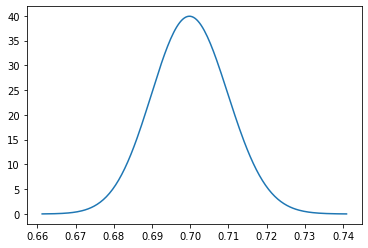

In [17]:
plt.plot(lognormal_graph(0.7,0.01)[0], lognormal_graph(0.7,0.01)[1])

In [18]:
'''
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1) #a 1-row, 2-column figure: go to the first subplot.
plt.plot(q_selected, P_cyl_cs_approx_values(q_selected, 40.0, 50.0, 1000.0, 1.0), label='cs cylinder approx')
plt.plot(q_selected, P_cyl_cs_approx_smear_poly_values(q_selected, 40.0, 10.0, 1000.0, 1.0, 3.0, 2.0, 0.001), label='cs cylinder approx poly smear')
plt.yscale('log')
#plt.xscale('log')
plt.legend()

plt.subplot(1, 2, 2) #1-row, 2-column figure: go to the second subplot.
plt.plot(lognormal_graph(40.0,0.01)[0],lognormal_graph(40.0,0.01)[1], color='orange')

"""
print('cylinder approx time')
%timeit (P_cyl_cs_approx_values(q_selected, 40.0, 50.0, 1000.0, 1.0))

print('cylinder approx poly smear time')
%timeit (P_cyl_cs_approx_smear_poly_values(q_selected, 40.0, 50.0, 1000.0, 1.0, 3.0, 2.0, 3.0)"
""'
'''

'\nplt.figure(figsize=(15, 4))\n\nplt.subplot(1, 2, 1) #a 1-row, 2-column figure: go to the first subplot.\nplt.plot(q_selected, P_cyl_cs_approx_values(q_selected, 40.0, 50.0, 1000.0, 1.0), label=\'cs cylinder approx\')\nplt.plot(q_selected, P_cyl_cs_approx_smear_poly_values(q_selected, 40.0, 10.0, 1000.0, 1.0, 3.0, 2.0, 0.001), label=\'cs cylinder approx poly smear\')\nplt.yscale(\'log\')\n#plt.xscale(\'log\')\nplt.legend()\n\nplt.subplot(1, 2, 2) #1-row, 2-column figure: go to the second subplot.\nplt.plot(lognormal_graph(40.0,0.01)[0],lognormal_graph(40.0,0.01)[1], color=\'orange\')\n\n"""\nprint(\'cylinder approx time\')\n%timeit (P_cyl_cs_approx_values(q_selected, 40.0, 50.0, 1000.0, 1.0))\n\nprint(\'cylinder approx poly smear time\')\n%timeit (P_cyl_cs_approx_smear_poly_values(q_selected, 40.0, 50.0, 1000.0, 1.0, 3.0, 2.0, 3.0)"\n""\'\n'

Until now we have calculated $P(q)=\langle A(q)^2 \rangle$. Let's calculate also $\langle A(q) \rangle^2$, where
$$\langle A_{cyl-cs\perp}(q) \rangle = \frac{\int_{0}^{\infty}f(r)A_{cyl-cs\perp}(q,r) dr}{\int_{0}^{\infty}f(r)dr}$$
and, consequently, 
$$\langle A_{cyl-cs\perp}(q) \rangle^2 =\left[ \frac{\int_{0}^{\infty}f(r)A_{cyl-cs\perp}(q,r) dr}{\int_{0}^{\infty}f(r)dr}\right]^2$$

In [19]:
def A_cyl_cs_approx_smear_poly_squared(q_value, R_core, T, L, B, sig_out, sig_core, sig_R_core):
    #in this case, R_core is the average value for r, and sig_R_core its stardard deviation
    #R_out = r + T
    integrand = lambda r: log_norm(r, R_core, sig_R_core)*(A_cyl_perp(q_value,r + T)*smear(q_value,sig_out)-B*(R_core/(r + T))**2*A_cyl_perp(q_value,r)*smear(q_value,sig_core))
        
    r_min = R_core - 4.0*sig_R_core 
    r_max = R_core + 4.0*sig_R_core
    
    if r_min < 0:
        r_min = 0.0
    
    return P_cyl_cs_parallel(q_value, L)*(integration_1D(integrand, r_min, r_max,200))**2


def A_cyl_cs_approx_smear_poly_squared_values2(q_values, R_core, T, L, B, sig_out, sig_core, sig_R_core):
    #in this case, R_core is the average value for r, and sig_R_core its stardard deviation
    #R_out = r + T
    NFOLD = 50
    NRi_Ri_values = poly_gen_pedro(R_core, sig_R_core, NFOLD)
    NRi = NRi_Ri_values[0]
    Ri = NRi_Ri_values[1]
    SUM_tot = []
    
    for q in q_values:
        SUM = sum(NRi*(A_cyl_perp(q,Ri + T)*smear(q,sig_out)-B*(R_core/(Ri + T))**2*A_cyl_perp(q,Ri)*smear(q,sig_core)))
        SUM_tot.append(P_cyl_cs_parallel(q, L)*SUM**2)
    
    return np.asarray(SUM_tot)

def A_cyl_cs_approx_smear_poly_squared_values(q_values, R_core, T, L, B, sig_out, sig_core, sig_R_core):
    values = []
    for q in q_values:
        values.append(A_cyl_cs_approx_smear_poly_squared(q, R_core, T, L, B, sig_out, sig_core, sig_R_core))
    return np.asarray(values)

In [20]:
#%timeit (A_cyl_cs_approx_smear_poly_squared_values2(q_selected, R_corep, Tp, Lp, Bp, sig_outp, sig_corep, sig_R_corep))
#%timeit (A_cyl_cs_approx_smear_poly_squared_values(q_selected, R_corep, Tp, Lp, Bp, sig_outp, sig_corep, sig_R_corep))

Now,let's focus our attention to the structure factor, which means write the expression for $Z(q)$. The simplest version of it would be built using Gauss functions for the peak shape. However, let's use the more general peak function, as proposed by Sundblom2009:

$$Z(q)=c\frac{2}{\sqrt{3}a^2q}\sum_{hk}m_{hk}L_{hk}(q)$$

with 
    $$L_{hk}(q)=\frac{2}{\pi\delta}\left| \frac{\Gamma\left[0.5\nu+\frac{2\gamma_{nu}(q-q_{hk})}{\pi\delta}i\right]}{\Gamma[0.5\nu]}\right|^2$$

$$\gamma_{nu}=\sqrt{\pi}\frac{\Gamma\left[0.5(\nu+1)\right]}{\Gamma[0.5\nu]}$$

$$\int_{-\infty}^{\infty}L_{hk}(q)dq=1$$

$\delta$ is the width of the peaks, $\Gamma(z)$ is the complex gamma function, and $\nu$ determines the shape of the peak (if $\nu\rightarrow 0$, lorentzian, if $\nu\rightarrow \infty$, gaussian).

In [21]:
'''#plt.plot(q_selected, A_cyl_cs_perp_smear_poly_squared_values(q_selected, 40.0, 50.0, 1000.0, 1.0, 3.0, 2.0, 0.1))
#plt.plot(q_selected, A_cyl_cs_perp_smear_poly_squared_values(q_selected, 40.0, 50.0, 1000.0, 1.0, 3.0, 2.0, 3.1))
#plt.plot(q_selected, P_cyl_cs_approx_smear_poly_values(q_selected, 40.0, 50.0, 1000.0, 1.0, 3.0, 2.0, 3.1))
plt.plot(q_selected,A_cyl_cs_approx_smear_poly_squared_values(q_selected, 40.0, 50.0, 1000.0, 1.0, 3.0, 2.0, 0.1)/P_cyl_cs_approx_smear_poly_values(q_selected, 40.0, 50.0, 1000.0, 1.0, 3.0, 2.0, 0.1))
plt.yscale('log''
'''

"#plt.plot(q_selected, A_cyl_cs_perp_smear_poly_squared_values(q_selected, 40.0, 50.0, 1000.0, 1.0, 3.0, 2.0, 0.1))\n#plt.plot(q_selected, A_cyl_cs_perp_smear_poly_squared_values(q_selected, 40.0, 50.0, 1000.0, 1.0, 3.0, 2.0, 3.1))\n#plt.plot(q_selected, P_cyl_cs_approx_smear_poly_values(q_selected, 40.0, 50.0, 1000.0, 1.0, 3.0, 2.0, 3.1))\nplt.plot(q_selected,A_cyl_cs_approx_smear_poly_squared_values(q_selected, 40.0, 50.0, 1000.0, 1.0, 3.0, 2.0, 0.1)/P_cyl_cs_approx_smear_poly_values(q_selected, 40.0, 50.0, 1000.0, 1.0, 3.0, 2.0, 0.1))\nplt.yscale('log''\n"

In [22]:
"""
def peak_shape(q_value,nu,q0,delta):
    #the property of the abs of a complex number, i.e. abs(z) = sqrt(z*z.conjugate), so that abs(z)**2 = z*z.conjugate
    Pi = np.pi
    Arg = 2.0/(Pi*delta)
    y_nu = Arg*(q_value-q0)
    gamma_nu = np.sqrt(Pi)*ss.gamma(complex(0.5*(nu+1.0),0.0))/ss.gamma(complex(0.5*nu,0.0))
    
    return (Arg)*(abs(ss.gamma(complex(0.5*nu,gamma_nu*y_nu))/ss.gamma(complex(0.5*nu,0.0))))**2

def peak_values(q_values,nu,q0,delta):
    peak_values = []
    for q in q_values:
        peak_values.append(peak_shape(q,nu,q0,delta))
    return np.asarray(peak_values)

def Z0_Q (q_value, nu,q0,delta, c, a):
    Aux = c*2.0/(np.sqrt(3.0)*a**2*q_value)
    
    return Aux*(6.0*peak_shape(q_value,nu,q0,delta)+6.0*peak_shape(q_value,nu,np.sqrt(3.0)*q0,delta)\
            +6.0*peak_shape(q_value,nu,2.0*q0,delta)+12.0*peak_shape(q_value,nu,np.sqrt(7.0)*q0,delta)\
            +6.0*peak_shape(q_value,nu,3.0*q0,delta))

def Z0_Q_values(q_values, nu, q0, delta, c, a):
    values = []
    for q in q_values:
        values.append(Z0_Q (q, nu,q0,delta, c, a))
    return np.asarray(values)
    
"""

'\ndef peak_shape(q_value,nu,q0,delta):\n    #the property of the abs of a complex number, i.e. abs(z) = sqrt(z*z.conjugate), so that abs(z)**2 = z*z.conjugate\n    Pi = np.pi\n    Arg = 2.0/(Pi*delta)\n    y_nu = Arg*(q_value-q0)\n    gamma_nu = np.sqrt(Pi)*ss.gamma(complex(0.5*(nu+1.0),0.0))/ss.gamma(complex(0.5*nu,0.0))\n    \n    return (Arg)*(abs(ss.gamma(complex(0.5*nu,gamma_nu*y_nu))/ss.gamma(complex(0.5*nu,0.0))))**2\n\ndef peak_values(q_values,nu,q0,delta):\n    peak_values = []\n    for q in q_values:\n        peak_values.append(peak_shape(q,nu,q0,delta))\n    return np.asarray(peak_values)\n\ndef Z0_Q (q_value, nu,q0,delta, c, a):\n    Aux = c*2.0/(np.sqrt(3.0)*a**2*q_value)\n    \n    return Aux*(6.0*peak_shape(q_value,nu,q0,delta)+6.0*peak_shape(q_value,nu,np.sqrt(3.0)*q0,delta)            +6.0*peak_shape(q_value,nu,2.0*q0,delta)+12.0*peak_shape(q_value,nu,np.sqrt(7.0)*q0,delta)            +6.0*peak_shape(q_value,nu,3.0*q0,delta))\n\ndef Z0_Q_values(q_values, nu, q0, delta

In [23]:
def peak_shape(q_value,nu,q0,delta):
    #the property of the abs of a complex number, i.e. abs(z) = sqrt(z*z.conjugate), so that abs(z)**2 = z*z.conjugate
    PI = np.pi
    Aux1 = ss.gamma(0.5*nu)
    Aux2 = 2.0/(PI*delta)
    
    y_nu = 2.0j*(q_value-q0)/(PI*delta)
    #print('this is y_nu')
    #print(y_nu)
    
    #gamma_nu = np.sqrt(PI)*ss.gamma(complex(0.5*(nu+1.0),0.0))/ss.gamma(complex(0.5*nu,0.0))
    gamma_nu = np.sqrt(PI)*ss.gamma(0.5*(nu+1.0))/Aux1
    #print('this is gamma_nu')
    #print(gamma_nu)
    
    return Aux2*abs(ss.gamma(0.5*nu + gamma_nu*y_nu)/Aux1)**2
    
#peak_values2 = np.vectorize(peak_shape2)
    
def Z0_Q (q, nu,q0,delta, c, a):
    Aux = c*2.0/(np.sqrt(3.0)*a**2*q)
    
    return Aux*(6.0*peak_shape(q,nu,q0,delta)+6.0*peak_shape(q,nu,np.sqrt(3.0)*q0,delta)\
            +6.0*peak_shape(q,nu,2.0*q0,delta)+12.0*peak_shape(q,nu,np.sqrt(7.0)*q0,delta)\
            +6.0*peak_shape(q,nu,3.0*q0,delta))


In [24]:
'''#plt.plot(q_selected, Z0_Q2(q_selected, 0.001, 0.065, 0.001, 1.0, 117.0), zorder = 1)
plt.plot(q_selected, Z0_Q(q_selected, 0.001, 0.065, 0.001, 1.0, 117.0), zorder = 10)
'''

'#plt.plot(q_selected, Z0_Q2(q_selected, 0.001, 0.065, 0.001, 1.0, 117.0), zorder = 1)\nplt.plot(q_selected, Z0_Q(q_selected, 0.001, 0.065, 0.001, 1.0, 117.0), zorder = 10)\n'

Now we have conditions to put all functions together. The theoretical scattered intensity presented earlier:
$$\frac{d\sigma(q)}{d\Omega}=(\rho_1-\rho_2)^2n_d [\langle A(q)^2 \rangle + \langle A(q)\rangle^2(\langle Z(q) \rangle-1)]$$ 
will become the fitting expression:
$$\frac{d\sigma(q)}{d\Omega}=sc\cdot [\langle A(q)^2 \rangle + \langle A(q)\rangle^2(\langle Z(q) \rangle-1)] + back$$
This will be called "model 1".

In [25]:
def model1(q_value, R_core, T, B, sig_R_core, q0, nu, delta, c, sc, back):
    L = 1000.0
    sig_out = 3.0
    sig_core = 2.0
    a = 4.0*np.pi/(q0*np.sqrt(3.0))
    
    Pcyl = P_cyl_cs_approx_smear_poly(q_value, R_core, T, L, B, sig_out, sig_core, sig_R_core)
    Acyl = A_cyl_cs_approx_smear_poly_squared(q_value, R_core, T, L, B, sig_out, sig_core, sig_R_core)
    Z0 = Z0_Q (q_value, nu,q0,delta, c, a)
    
    return sc*(Pcyl+Acyl*(Z0-1.0))+back
    #return Pcyl+Acyl*(Z0)
    #return Pcyl*(1.0+(Acyl/Pcyl)*(Z0-1))

def model1_values(q_values,R_core, T, B, sig_R_core, q0, nu, delta, c, sc, back):
    values = []
    for q in q_values:
        values.append(model1(q, R_core, T, B, sig_R_core, q0, nu, delta, c, sc, back))
    return np.asarray(values)

In [26]:
#let's creat an array containing q values, in angstrons^-1
q_theoretical = np.linspace(0.01, 0.6, num=1000)

In [28]:
'''R_corep = 37.0
Tp = 32.0
Bp = 0.5
sig_R_corep = 1.0
q0p = 0.06
nup = 5.0
deltap = 0.0006
cp = 1.0
scp = 1.0
backp = 0.0

Lp = 1000.0
sig_outp = 3.0
sig_corep = 2.0

plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1) #a 1-row, 2-column figure: go to the first subplot.
plt.plot(q_selected, model1_values(q_selected, R_corep, Tp, Bp, sig_R_corep, q0p, nup, deltap, cp, scp, backp))
plt.plot(q_selected, P_cyl_cs_approx_smear_poly_values(q_selected, R_corep, Tp, Lp, Bp, sig_outp, sig_corep, sig_R_corep), '--')
#plt.plot(q_selected, A_cyl_cs_perp_smear_poly_squared_values(q_selected, R_corep, Tp, Lp, Bp, sig_outp, sig_corep, sig_R_corep))
plt.yscale('log')

plt.subplot(1, 2, 2) #1-row, 2-column figure: go to the second subplot.
plt.plot(lognormal_graph(R_corep,sig_R_corep)[0],lognormal_graph(R_corep,sig_R_corep)[1]'
'''

"R_corep = 37.0\nTp = 32.0\nBp = 0.5\nsig_R_corep = 1.0\nq0p = 0.06\nnup = 5.0\ndeltap = 0.0006\ncp = 1.0\nscp = 1.0\nbackp = 0.0\n\nLp = 1000.0\nsig_outp = 3.0\nsig_corep = 2.0\n\nplt.figure(figsize=(15, 4))\n\nplt.subplot(1, 2, 1) #a 1-row, 2-column figure: go to the first subplot.\nplt.plot(q_selected, model1_values(q_selected, R_corep, Tp, Bp, sig_R_corep, q0p, nup, deltap, cp, scp, backp))\nplt.plot(q_selected, P_cyl_cs_approx_smear_poly_values(q_selected, R_corep, Tp, Lp, Bp, sig_outp, sig_corep, sig_R_corep), '--')\n#plt.plot(q_selected, A_cyl_cs_perp_smear_poly_squared_values(q_selected, R_corep, Tp, Lp, Bp, sig_outp, sig_corep, sig_R_corep))\nplt.yscale('log')\n\nplt.subplot(1, 2, 2) #1-row, 2-column figure: go to the second subplot.\nplt.plot(lognormal_graph(R_corep,sig_R_corep)[0],lognormal_graph(R_corep,sig_R_corep)[1]'\n"

We can improve more the model. Firstly, by introducing a disorder parameter acting on the cylinder arrangement, like the Debye-Waller factor describing thermal vibrations in the crystals:

$$G(q)=\exp{(-\sigma_a^2 a^2 q^2)}$$

where $\sigma_a^2$ is the relative mean square displacement of the cylinder positions, which will case the distortions in the lattice. Other improvement is related to polymer-like scattering contribution at high $q$ due to micelle polymer formation during the sinthesis. This contribution is given by:

$$I_{chain}(q)=\frac{2[\exp{(-q^2R_g^2)}-1+(q^2R_g^2)]}{(q^2R_g^2)^2}$$

where $R_g$ is the radius of gyration of the chain. So, the "model 2" is:

$$\frac{d\sigma(q)}{d\Omega}=sc1\cdot [\langle A(q)^2 \rangle + \langle A(q)\rangle^2(\langle Z(q) \rangle-1)G(q)] + sc2\cdot I_{chain}(q)+back$$


In [29]:
def G_Q(sig_a, a, q):
    #sig_a^2 is the relative mean square displacement that describes how the position of every stiff 
    #cylinder varies around its average position
    
    #a is the lattice parameter
    return np.exp(-(sig_a*a*q)**2)

def I_Q_chain(q,Rg):
    Aux = (q*Rg)**2
    return 2.0*(np.exp(-Aux)-1.0+Aux)/Aux**2

def model2(q_value, R_core, T, B, sig_R_core, q0, nu, delta, c, sig_a, Rg, sc1, sc2, back):
    L = 1000.0
    sig_out = 3.0
    sig_core = 2.0
    a = 4.0*np.pi/(q0*np.sqrt(3.0))
    
    Pcyl = P_cyl_cs_approx_smear_poly(q_value, R_core, T, L, B, sig_out, sig_core, sig_R_core)
    Acyl = A_cyl_cs_approx_smear_poly_squared(q_value, R_core, T, L, B, sig_out, sig_core, sig_R_core)
    Z0 = Z0_Q (q_value, nu,q0,delta, c, a)
    GQ = G_Q(sig_a, a, q_value)
    Ichain = I_Q_chain(q_value,Rg)
    
    return sc1*(Pcyl+Acyl*(Z0-1.0)*GQ)+sc2*Ichain+back
    #return Pcyl+Acyl*(Z0)
    #return Pcyl*(1.0+(Acyl/Pcyl)*(Z0-1))

def model2_values(q_values,R_core, T, B, sig_R_core, q0, nu, delta, c, sig_a, Rg, sc1, sc2, back):
    values = []
    for q in q_values:
        values.append(model2(q, R_core, T, B, sig_R_core, q0, nu, delta, c, sig_a, Rg, sc1, sc2, back))
    return np.asarray(values)

In [30]:
'''
R_corep = 37.0
Tp = 32.0
Bp = 0.0
sig_R_corep = 1.0
q0p = 0.0612
nup = 5.0
deltap = 0.0006
cp = 1.0
sig_ap = 0.001
Rgp = 60.0
sc1p = 1.0
sc2p = 0.0001
backp = 0.0

Lp = 1000.0
sig_outp = 3.0
sig_corep = 2.0

plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1) #a 1-row, 2-column figure: go to the first subplot.
plt.plot(q_selected, model2_values(q_selected, R_corep, Tp, Bp, sig_R_corep, q0p, nup, deltap, cp, sig_ap, Rgp, sc1p, sc2p, backp))
plt.plot(q_selected, P_cyl_cs_approx_smear_poly_values(q_selected, R_corep, Tp, Lp, Bp, sig_outp, sig_corep, sig_R_corep), '--')
#plt.plot(q_selected, A_cyl_cs_perp_smear_poly_squared_values(q_selected, R_corep, Tp, Lp, Bp, sig_outp, sig_corep, sig_R_corep))
plt.yscale('log')
plt.xscale('log')

plt.subplot(1, 2, 2) #1-row, 2-column figure: go to the second subplot.
plt.plot(lognormal_graph(R_corep,sig_R_corep)[0],lognormal_graph(R_corep,sig_R_corep)[1]'
'''

"\nR_corep = 37.0\nTp = 32.0\nBp = 0.0\nsig_R_corep = 1.0\nq0p = 0.0612\nnup = 5.0\ndeltap = 0.0006\ncp = 1.0\nsig_ap = 0.001\nRgp = 60.0\nsc1p = 1.0\nsc2p = 0.0001\nbackp = 0.0\n\nLp = 1000.0\nsig_outp = 3.0\nsig_corep = 2.0\n\nplt.figure(figsize=(15, 4))\n\nplt.subplot(1, 2, 1) #a 1-row, 2-column figure: go to the first subplot.\nplt.plot(q_selected, model2_values(q_selected, R_corep, Tp, Bp, sig_R_corep, q0p, nup, deltap, cp, sig_ap, Rgp, sc1p, sc2p, backp))\nplt.plot(q_selected, P_cyl_cs_approx_smear_poly_values(q_selected, R_corep, Tp, Lp, Bp, sig_outp, sig_corep, sig_R_corep), '--')\n#plt.plot(q_selected, A_cyl_cs_perp_smear_poly_squared_values(q_selected, R_corep, Tp, Lp, Bp, sig_outp, sig_corep, sig_R_corep))\nplt.yscale('log')\nplt.xscale('log')\n\nplt.subplot(1, 2, 2) #1-row, 2-column figure: go to the second subplot.\nplt.plot(lognormal_graph(R_corep,sig_R_corep)[0],lognormal_graph(R_corep,sig_R_corep)[1]'\n"

The final part of improvements is introduce smearing effects into the theoretical intensity $\frac{d\sigma(q)}{d\Omega}$ through the resolution function $R(\langle q \rangle, q)$, where $q$ denotes the ideal $q$, and $\langle q \rangle$ the measured one. So, the expression to be compared to the experimental intensity is:

$$I(\langle q \rangle)=\int_{-\infty}^{+\infty}R(\langle q \rangle, q)\cdot \frac{d\sigma(q)}{d\Omega} dq$$

Assuming a gaussian beam profile, $R(\langle q \rangle, q)$ is given by:

$$R(\langle q \rangle, q)=\frac{q}{\sigma^2}\cdot\exp{\left ( -\frac{\langle q \rangle^2+q^2}{2\sigma^2}\right )}\cdot I_0\left ( \frac{\langle q \rangle q}{\sigma^2}\right)$$

being $I_0(x)$ the zeroth-order modified Bessel function of first kind.

For $\langle q \rangle q >> \sigma^2$, $I_0\left ( \frac{\langle q \rangle q}{\sigma^2}\right)\approx \frac{2\pi\langle q\rangle q}{\sigma^2}^{-1/2}\exp\left(\frac{\langle q \rangle q}{\sigma^2}\right)$, which implies:

$$R(\langle q \rangle, q)\approx \frac{\sqrt{q}}{(2\pi\langle q\rangle \sigma^2)^{1/2}}\exp\left(-\frac{(\langle q \rangle -q)^2}{2\sigma^2}\right)$$

This last expression is easier to work out, and valid for all $q$ range in this study, since $\sigma \sim 0.001$, which implies $\langle q \rangle q >> \sigma^2$.

In [31]:
#simpler resolution function, valid for q*x>>sig**2

def Res_func(q,q_exp,sig):
    sig2 = 2.0*sig**2
    Aux = 1.0/np.sqrt(sig2*np.pi*q_exp)
    
    result = Aux*np.sqrt(q)*np.exp(-(q_exp-q)**2/sig2)
    
    return result

def model2_res(q_value, R_core, T, B, sig_R_core, q0, nu, delta, c, sig_a, Rg, sc1, sc2, back):
    sig = 0.002
    
    integrand = lambda q: Res_func(q,q_value,sig)*model2_values(q, R_core, T, B, sig_R_core, q0, nu, delta, c, sig_a, Rg, sc1, sc2, back)
    
    qmin = q_value - 4.0*sig 
    qmax = q_value + 4.0*sig
    #print (qmin, qmax)
    if qmin < 0:
        qmin = 0.0
        
    return integration_1D(integrand, qmin, qmax, 20)

def model2_res_values(q_values,R_core, T, B, sig_R_core, q0, nu, delta, c, sig_a, Rg, sc1, sc2, back):
    values = []
    for q in q_values:
        values.append(model2_res(q, R_core, T, B, sig_R_core, q0, nu, delta, c, sig_a, Rg, sc1, sc2, back))
    return np.asarray(values)

In [32]:
'''plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1) #a 1-row, 2-column figure: go to the first subplot.
plt.plot(q_selected, model2_values(q_selected, R_corep, Tp, Bp, sig_R_corep, q0p, nup, deltap, cp, sig_ap, Rgp, sc1p, sc2p, backp))
plt.plot(q_selected, model2_res_values(q_selected, R_corep, Tp, Bp, sig_R_corep, q0p, nup, deltap, cp, sig_ap, Rgp, sc1p, sc2p, backp))
#plt.plot(q_selected, model2_values(q_selected, R_corep, Tp, Bp, sig_R_corep, q0p, nup, 0.0025, cp, sig_ap, Rgp, sc1p, sc2p, backp))
#plt.plot(q_selected, A_cyl_cs_perp_smear_poly_squared_values(q_selected, R_corep, Tp, Lp, Bp, sig_outp, sig_corep, sig_R_corep))
plt.yscale('log')
plt.xscale('log')

plt.subplot(1, 2, 2) #1-row, 2-column figure: go to the second subplot.
plt.plot(lognormal_graph(R_corep,sig_R_corep)[0],lognormal_graph(R_corep,sig_R_corep)[1])

#%timeit (model2_res_values(q_selected, R_corep, Tp, Bp, sig_R_corep, q0p, nup, deltap, cp, sig_ap, Rgp, sc1p, sc2p, backp))
'''

"plt.figure(figsize=(15, 6))\n\nplt.subplot(1, 2, 1) #a 1-row, 2-column figure: go to the first subplot.\nplt.plot(q_selected, model2_values(q_selected, R_corep, Tp, Bp, sig_R_corep, q0p, nup, deltap, cp, sig_ap, Rgp, sc1p, sc2p, backp))\nplt.plot(q_selected, model2_res_values(q_selected, R_corep, Tp, Bp, sig_R_corep, q0p, nup, deltap, cp, sig_ap, Rgp, sc1p, sc2p, backp))\n#plt.plot(q_selected, model2_values(q_selected, R_corep, Tp, Bp, sig_R_corep, q0p, nup, 0.0025, cp, sig_ap, Rgp, sc1p, sc2p, backp))\n#plt.plot(q_selected, A_cyl_cs_perp_smear_poly_squared_values(q_selected, R_corep, Tp, Lp, Bp, sig_outp, sig_corep, sig_R_corep))\nplt.yscale('log')\nplt.xscale('log')\n\nplt.subplot(1, 2, 2) #1-row, 2-column figure: go to the second subplot.\nplt.plot(lognormal_graph(R_corep,sig_R_corep)[0],lognormal_graph(R_corep,sig_R_corep)[1])\n\n#%timeit (model2_res_values(q_selected, R_corep, Tp, Bp, sig_R_corep, q0p, nup, deltap, cp, sig_ap, Rgp, sc1p, sc2p, backp))\n"

The method **model2_res_values** is very slow. It takes approximately 8s to work with 367 $q$ values. We must change its code in order to make it faster. Probably, most of the problem is the double for needed since we are using the method **model2_values** twice: first, in the **model2_res**, and second, in the **model2_res_values**. This is because **model2** can not handle with an array entry, and integration_1D demands this. So, instead change integration_1D, which is efficient and fast, because it does not use while or for, we can focus on **model2** method.

In [33]:
def model22(q_values, R_core, T, B, sig_R_core, q0, nu, delta, c, sig_a, Rg, sc1, sc2, back):
    L = 1000.0
    sig_out = 3.0
    sig_core = 2.0
    a = 4.0*np.pi/(q0*np.sqrt(3.0))
    
    Pcyl = P_cyl_cs_approx_smear_poly_values2(q_values, R_core, T, L, B, sig_out, sig_core, sig_R_core)
    Acyl = A_cyl_cs_approx_smear_poly_squared_values2(q_values, R_core, T, L, B, sig_out, sig_core, sig_R_core)
    Z0 = Z0_Q(q_values, nu,q0,delta, c, a)
    GQ = G_Q(sig_a, a, q_values)
    Ichain = I_Q_chain(q_values,Rg)
    return sc1*(Pcyl+Acyl*(Z0-1.0)*GQ)+sc2*Ichain+back

def model22_fixed_nu_Rg(q_values, R_core, T, B, sig_R_core, q0, delta, c, sig_a, sc1, sc2, back):
    nu = 0.01
    Rg = 50.0
    L = 1000.0
    sig_out = 3.0
    sig_core = 2.0
    a = 4.0*np.pi/(q0*np.sqrt(3.0))
    
    Pcyl = P_cyl_cs_approx_smear_poly_values2(q_values, R_core, T, L, B, sig_out, sig_core, sig_R_core)
    Acyl = A_cyl_cs_approx_smear_poly_squared_values2(q_values, R_core, T, L, B, sig_out, sig_core, sig_R_core)
    Z0 = Z0_Q(q_values, nu,q0,delta, c, a)
    GQ = G_Q(sig_a, a, q_values)
    Ichain = I_Q_chain(q_values,Rg)
    return sc1*(Pcyl+Acyl*(Z0-1.0)*GQ)+sc2*Ichain+back

def model22_res(q_value, R_core, T, B, sig_R_core, q0, nu, delta, c, sig_a, Rg, sc1, sc2, back):
    sig = 0.002
    
    integrand = lambda q: Res_func(q,q_value,sig)*model22(q, R_core, T, B, sig_R_core, q0, nu, delta, c, sig_a, Rg, sc1, sc2, back)
    
    qmin = q_value - 4.0*sig 
    qmax = q_value + 4.0*sig
    #print (qmin, qmax)
    if qmin < 0:
        qmin = 0.0
        
    return integration_1D(integrand, qmin, qmax, 20)

def model22_res_values(q_values,R_core, T, B, sig_R_core, q0, nu, delta, c, sig_a, Rg, sc1, sc2, back):
    values = []
    for q in q_values:
        values.append(model22_res(q, R_core, T, B, sig_R_core, q0, nu, delta, c, sig_a, Rg, sc1, sc2, back))
    return np.asarray(values)

In [34]:
#%timeit (model22_res_values(q_selected, R_corep, Tp, Bp, sig_R_corep, q0p, nup, deltap, cp, sig_ap, Rgp, sc1p, sc2p, backp))

In [35]:
#%timeit (model22(q_selected, R_corep, Tp, Bp, sig_R_corep, q0p, nup, deltap, cp, sig_ap, Rgp, sc1p, sc2p, backp))
#%timeit (model2_values(q_selected, R_corep, Tp, Bp, sig_R_corep, q0p, nup, deltap, cp, sig_ap, Rgp, sc1p, sc2p, backp))

In [37]:
'''plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1) #a 1-row, 2-column figure: go to the first subplot.
plt.plot(q_selected, model22_res_values(q_selected, R_corep, Tp, Bp, sig_R_corep, q0p, nup, deltap, cp, sig_ap, Rgp, sc1p, sc2p, backp))
plt.plot(q_selected, model2_res_values(q_selected, R_corep, Tp, Bp, sig_R_corep, q0p, nup, deltap, cp, sig_ap, Rgp, sc1p, sc2p, backp))
#plt.plot(q_selected, model2_values(q_selected, R_corep, Tp, Bp, sig_R_corep, q0p, nup, 0.0025, cp, sig_ap, Rgp, sc1p, sc2p, backp))
#plt.plot(q_selected, A_cyl_cs_perp_smear_poly_squared_values(q_selected, R_corep, Tp, Lp, Bp, sig_outp, sig_corep, sig_R_corep))
plt.yscale('log')
plt.xscale('log')

plt.subplot(1, 2, 2) #1-row, 2-column figure: go to the second subplot.
plt.plot(lognormal_graph(R_corep,sig_R_corep)[0],lognormal_graph(R_corep,sig_R_corep)[1])
'''

"plt.figure(figsize=(15, 6))\n\nplt.subplot(1, 2, 1) #a 1-row, 2-column figure: go to the first subplot.\nplt.plot(q_selected, model22_res_values(q_selected, R_corep, Tp, Bp, sig_R_corep, q0p, nup, deltap, cp, sig_ap, Rgp, sc1p, sc2p, backp))\nplt.plot(q_selected, model2_res_values(q_selected, R_corep, Tp, Bp, sig_R_corep, q0p, nup, deltap, cp, sig_ap, Rgp, sc1p, sc2p, backp))\n#plt.plot(q_selected, model2_values(q_selected, R_corep, Tp, Bp, sig_R_corep, q0p, nup, 0.0025, cp, sig_ap, Rgp, sc1p, sc2p, backp))\n#plt.plot(q_selected, A_cyl_cs_perp_smear_poly_squared_values(q_selected, R_corep, Tp, Lp, Bp, sig_outp, sig_corep, sig_R_corep))\nplt.yscale('log')\nplt.xscale('log')\n\nplt.subplot(1, 2, 2) #1-row, 2-column figure: go to the second subplot.\nplt.plot(lognormal_graph(R_corep,sig_R_corep)[0],lognormal_graph(R_corep,sig_R_corep)[1])\n"

In [38]:
#vamos gerar uma matriz de resolucao, para tentar reduzir o tempo de calculo

#function that provide NFOLD resoluction values for RESO function
def FMODELP_gen_pedro(q_value, sig, NFOLD):
    #params is a array containing the model parameters
    #N_convolutions
    #NFOLD = 25
    Dx=8.0*sig/float(NFOLD)
    xmin=q_value-4.0*sig
    xmax=q_value+4.0*sig
    if(xmin < 0.0):
        xmin=0.0
    xi = np.linspace(xmin+0.5*Dx, xmax-0.5*Dx, NFOLD)
    FF = Res_func(xi,q_value,sig)*Dx

    return FF, xi


def RESO_Pedro(q_values, sig, NFOLD):
    #q_values is a array containing the q values
    #NFOLD is the number of convolutions

    #number_of_rows = len(q_values)
    #number_of_elements_each_row = NFOLD 
    
    #Rij = np.zeros((number_of_rows,number_of_elements_each_row))
    #Rij = np.zeros(len(q_values))
    Rij = []
    xij = []
    #qij = np.zeros((number_of_rows,number_of_elements_each_row))
    #FF = np.zeros(len(q_values))
    
    for q in q_values:
        Rij.append(FMODELP_gen_pedro(q, sig, NFOLD)[0])
        xij.append(FMODELP_gen_pedro(q, sig, NFOLD)[1])
    return Rij, xij

Resolution = RESO_Pedro(q_filtered3, 0.002, 20)

def FSMEARED(q_values, *parameters):
    #params is a array containing the model parameters
    #sig = 0.002
    #NFOLD = 18
    #Resolution = RESO_Pedro(q_values, sig, NFOLD)
    
    SUM_tot = []
   
    for j in range(len(q_values)):
        FF = Resolution[0][j]
        Q = Resolution[1][j]
        SUM = sum(model22(Q, *parameters)*FF)
        SUM_tot.append(SUM)
    
    return np.asarray(SUM_tot)

def FSMEARED2(q_values, *parameters):
    #params is a array containing the model parameters
    #sig = 0.002
    #NFOLD = 18
    #Resolution = RESO_Pedro(q_values, sig, NFOLD)
    
    SUM_tot = []
   
    for j in range(len(q_values)):
        FF = Resolution[0][j]
        Q = Resolution[1][j]
        SUM = sum(model22_fixed_nu_Rg(Q, *parameters)*FF)
        SUM_tot.append(SUM)
    
    return np.asarray(SUM_tot)

# Simulations

In [40]:
'''param0 = (R_corep, Tp, Bp, sig_R_corep, q0p, deltap, cp, sig_ap, sc1p, sc2p, backp)
lowerbound = (20.0, 5.0, -10.0, 1.0e-2*sig_R_corep, 0.8*q0p, 0.000000001,0.01, 1.0e-5*sig_ap, 1.0e-5*sc1p, 1.0e-5*sc2p, -10.0)
upperbound = (100.0, 100.0, 10.0, 1.0e+2*sig_R_corep, 1.2*q0p, 1000.0,100.0, 1.0e+5*sig_ap, 1.0e+5*sc1p, 1.0e+5*sc2p, 10.0)'''

'param0 = (R_corep, Tp, Bp, sig_R_corep, q0p, deltap, cp, sig_ap, sc1p, sc2p, backp)\nlowerbound = (20.0, 5.0, -10.0, 1.0e-2*sig_R_corep, 0.8*q0p, 0.000000001,0.01, 1.0e-5*sig_ap, 1.0e-5*sc1p, 1.0e-5*sc2p, -10.0)\nupperbound = (100.0, 100.0, 10.0, 1.0e+2*sig_R_corep, 1.2*q0p, 1000.0,100.0, 1.0e+5*sig_ap, 1.0e+5*sc1p, 1.0e+5*sc2p, 10.0)'

In [41]:
'''start = timer()
popt, pcov = curve_fit(FSMEARED2, q_filtered3, I_filtered3, sigma = errI_filtered3, p0 = param0, bounds = (lowerbound,upperbound), absolute_sigma=True, maxfev = 100000)
end = timer()
print(end-start)
allDone()'''

'start = timer()\npopt, pcov = curve_fit(FSMEARED2, q_filtered3, I_filtered3, sigma = errI_filtered3, p0 = param0, bounds = (lowerbound,upperbound), absolute_sigma=True, maxfev = 100000)\nend = timer()\nprint(end-start)\nallDone()'

In [42]:
'''R_corepr, Tpr, Bpr, sig_R_corepr, q0pr,deltapr, cpr, sig_apr, sc1pr, sc2pr, backpr = popt

plt.figure(figsize=(10, 5))
plt.errorbar(q_selected,I_selected,yerr=errI_selected, fmt='ko', zorder = 1)
#plt.plot(q_selected, 100000*A_cyl_cs_approx_smear_poly_squared_values2(q_selected, R_corepr, Tpr, Lp, Bpr, sig_outp, sig_corep, sig_R_corepr), '--')
#plt.plot(q_filtered3,FSMEARED(q_filtered3, *popt), zorder = 10)
plt.plot(q_filtered3, FSMEARED2(q_filtered3, *popt))

#Derived Chi Squared Value For This Model
chi_squared = np.sum(((FSMEARED2(q_filtered3, *popt)-I_filtered3)/errI_filtered3)**2)
reduced_chi_squared = (chi_squared)/(len(q_filtered3)-len(popt))
#print ('The degrees of freedom for this test is', len(q_selected)-len(popt))
#print ('The chi squared value is: ',("%.2f" %chi_squared))
print ('The reduced chi squared value is: ',("%.2f" %reduced_chi_squared))


#plt.xscale('log')
plt.yscale('log')
#plt.legend()
'''

'R_corepr, Tpr, Bpr, sig_R_corepr, q0pr,deltapr, cpr, sig_apr, sc1pr, sc2pr, backpr = popt\n\nplt.figure(figsize=(10, 5))\nplt.errorbar(q_selected,I_selected,yerr=errI_selected, fmt=\'ko\', zorder = 1)\n#plt.plot(q_selected, 100000*A_cyl_cs_approx_smear_poly_squared_values2(q_selected, R_corepr, Tpr, Lp, Bpr, sig_outp, sig_corep, sig_R_corepr), \'--\')\n#plt.plot(q_filtered3,FSMEARED(q_filtered3, *popt), zorder = 10)\nplt.plot(q_filtered3, FSMEARED2(q_filtered3, *popt))\n\n#Derived Chi Squared Value For This Model\nchi_squared = np.sum(((FSMEARED2(q_filtered3, *popt)-I_filtered3)/errI_filtered3)**2)\nreduced_chi_squared = (chi_squared)/(len(q_filtered3)-len(popt))\n#print (\'The degrees of freedom for this test is\', len(q_selected)-len(popt))\n#print (\'The chi squared value is: \',("%.2f" %chi_squared))\nprint (\'The reduced chi squared value is: \',("%.2f" %reduced_chi_squared))\n\n\n#plt.xscale(\'log\')\nplt.yscale(\'log\')\n#plt.legend()\n'

# SIMULATION CURVE - WITHOUT SMEARING

In [43]:
#pseudoVoigt peak function = linear combination between gaussian and lorentizian functions

def pseudoVoigt(q_value, q0, I, gamma, eta):
    ln2 = np.log(2.0)
    pi = np.pi
    delta2 = (q_value - q0)**2
    Aux = gamma/2.0
    
    a_G = np.sqrt(ln2/pi)/Aux
    b_G = ln2/(Aux)**2
    
    gauss = a_G*np.exp(-b_G*delta2)
    
    lorentz = (Aux/pi)/(delta2+(Aux)**2)
    
    return I*(eta*gauss+(1.0-eta)*lorentz)

def pseudoVoigt_no_I(q_value, q0, gamma, eta):
    ln2 = np.log(2.0)
    pi = np.pi
    delta2 = (q_value - q0)**2
    Aux = gamma/2.0
    
    a_G = np.sqrt(ln2/pi)/Aux
    b_G = ln2/(Aux)**2
    
    gauss = a_G*np.exp(-b_G*delta2)
    
    lorentz = (Aux/pi)/(delta2+(Aux)**2)
    
    return eta*gauss+(1.0-eta)*lorentz

In [44]:
#Z0 function with pseudoVoigt function with no I (peak intensity)
def Z0_Q_pV (q_value, q0,gamma, eta, c, a):
    Aux = c*2.0/(np.sqrt(3.0)*a**2*q_value)
    
    return Aux*(6.0*pseudoVoigt_no_I(q_value, q0, gamma, eta)+6.0*pseudoVoigt_no_I(q_value, np.sqrt(3.0)*q0, gamma, eta)\
            +6.0*pseudoVoigt_no_I(q_value, 2.0*q0, gamma, eta)+12.0*pseudoVoigt_no_I(q_value, np.sqrt(7.0)*q0, gamma, eta)\
            +6.0*pseudoVoigt_no_I(q_value, 3.0*q0, gamma, eta))

#model22 with pseudoVoigt peak function, without I (peak intensity)
def model222(q_values, R_core, T, B, sig_R_core, q0, gamma, eta, c, sig_a, Rg, sc1, sc2, back):
    L = 1000.0
    sig_out = 3.0
    sig_core = 2.0
    a = 4.0*np.pi/(q0*np.sqrt(3.0))
    
    Pcyl = P_cyl_cs_approx_smear_poly_values2(q_values, R_core, T, L, B, sig_out, sig_core, sig_R_core)
    Acyl = A_cyl_cs_approx_smear_poly_squared_values2(q_values, R_core, T, L, B, sig_out, sig_core, sig_R_core)
    Z0 = Z0_Q_pV (q_values, q0,gamma, eta, c, a)
    GQ = G_Q(sig_a, a, q_values)
    Ichain = I_Q_chain(q_values,Rg)
    return sc1*(Pcyl+Acyl*(Z0-1.0)*GQ)+sc2*Ichain+back



#model222 with no sig_R_core and sig_a parameters
def model2222(q_values, R_core, T, B, q0, gamma, eta, c, Rg, sc1, sc2, back):
    L = 1000.0
    sig_out = 3.0
    sig_core = 2.0
    a = 4.0*np.pi/(q0*np.sqrt(3.0))
    sig_R_core = 1.0
    sig_a = 0.01
    
    Pcyl = P_cyl_cs_approx_smear_poly_values2(q_values, R_core, T, L, B, sig_out, sig_core, sig_R_core)
    Acyl = A_cyl_cs_approx_smear_poly_squared_values2(q_values, R_core, T, L, B, sig_out, sig_core, sig_R_core)
    Z0 = Z0_Q_pV (q_values, q0,gamma, eta, c, a)
    GQ = G_Q(sig_a, a, q_values)
    Ichain = I_Q_chain(q_values,Rg)
    return sc1*(Pcyl+Acyl*(Z0-1.0)*GQ)+sc2*Ichain+back

def Structure_Factor(q_values, R_core, T, B, q0, gamma, eta, c, Rg, sc1, sc2, back):
    L = 1000.0
    sig_out = 3.0
    sig_core = 2.0
    a = 4.0*np.pi/(q0*np.sqrt(3.0))
    sig_R_core = 1.0
    sig_a = 0.01
    
    Pcyl = P_cyl_cs_approx_smear_poly_values2(q_values, R_core, T, L, B, sig_out, sig_core, sig_R_core)
    Acyl = A_cyl_cs_approx_smear_poly_squared_values2(q_values, R_core, T, L, B, sig_out, sig_core, sig_R_core)
    Z0 = Z0_Q_pV (q_values, q0,gamma, eta, c, a)
    GQ = G_Q(sig_a, a, q_values)
    Ichain = I_Q_chain(q_values,Rg)
    #return sc1*Pcyl*(1.0+(Acyl/Pcyl)*(Z0-1.0)*GQ)+sc2*Ichain+back
    return 1.0+(Acyl/Pcyl)*(Z0-1.0)*GQ

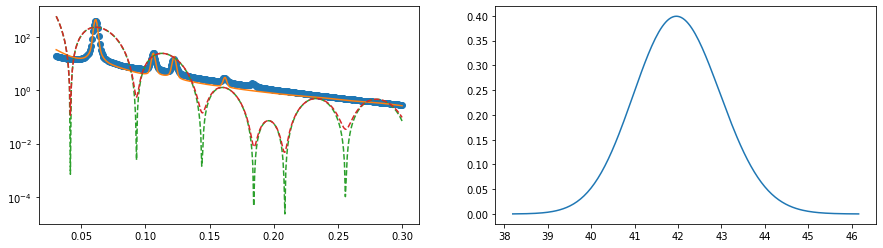

In [46]:
R_corep = 42.0
Tp = 33.0
Bp = 0.9
sig_R_corep = 1.0
q0p = 0.0612
gammap = 0.003
eta = 0.56
cp = 1.0
sig_ap = 0.001
Rgp = 60.0
sc1p = 90000.0
sc2p = 70.0
backp = -0.2

Lp = 1000.0
sig_outp = 3.0
sig_corep = 2.0

plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1) #a 1-row, 2-column figure: go to the first subplot.
plt.plot(q_selected, I_selected, 'o')
plt.plot(q_selected, model2222(q_selected, R_corep, Tp, Bp, q0p, gammap, eta, cp, Rgp, sc1p, sc2p, backp))
plt.plot(q_selected, 100000*A_cyl_cs_approx_smear_poly_squared_values2(q_selected, R_corep, Tp, Lp, Bp, sig_outp, sig_corep, sig_R_corep), '--')
plt.plot(q_selected, 100000*P_cyl_cs_approx_smear_poly_values2(q_selected, R_corep, Tp, Lp, Bp, sig_outp, sig_corep, sig_R_corep), '--')
plt.yscale('log')
#plt.xscale('log')

plt.subplot(1, 2, 2) #1-row, 2-column figure: go to the second subplot.
plt.plot(lognormal_graph(R_corep,sig_R_corep)[0],lognormal_graph(R_corep,sig_R_corep)[1])

In [47]:
param0 = (R_corep, Tp, Bp, q0p, gammap, eta, cp, Rgp, sc1p, sc2p, backp)
lowerbound = (0.9*R_corep,0.9*Tp, 0.89, 0.8*q0p, 0.00000001, 0.55,0.5, 10.0, 1.0e-5*sc1p, 1.0e-5*sc2p, -10.0)
upperbound = (1.1*R_corep, 1.1*Tp, 1.0, 1.2*q0p, 10.0, 0.57,100.0, 100.0, 1.0e+5*sc1p, 1.0e+5*sc2p, 10.0)

In [49]:
start = timer()
popt, pcov = curve_fit(model2222, q_selected, I_selected, sigma = errI_selected, p0 = param0, bounds = (lowerbound,upperbound), absolute_sigma=True, maxfev = 100000)
end = timer()
print(end-start)
allDone()

22.15073599499999


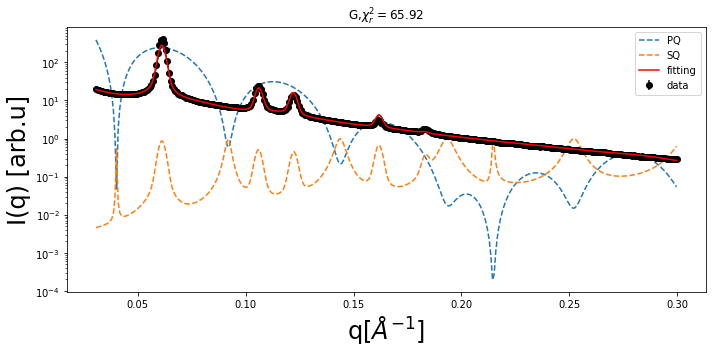

Parameter ,  Value ,  Error
******************************************
R_core ,     44.5391 ,      0.0336
T ,     29.7000 ,      0.0316
B ,      1.0000 ,      0.0020
sig_R_core ,  1.0 ,   fixed
q0 ,      0.0611 ,      0.0000
gamma ,      0.0037 ,      0.0000
eta ,      0.5500 ,      0.0046
c ,      0.5000 ,      0.0059
sig_a ,  0.001 ,  fixed
Rg ,     25.7102 ,      0.0182
sc1 ,  129300.4262 ,    894.9116
sc2 ,     21.3784 ,      0.0148
back ,     -0.4857 ,      0.0008
******************************************


In [53]:
R_corer, Tr, Br, q0r, gammar, etar, cr, Rgr, sc1r, sc2r, backr = popt
errR_corer, errTr, errBr, errq0r, errgammar, erretar, errcr, errRgr, errsc1r, errsc2r, errbackr = np.sqrt(np.diag(pcov))
#sigpopt = np.sqrt(np.diag(pcov)

bound_upper = model2222(q_selected, *(popt - np.sqrt(np.diag(pcov))))
bound_lower = model2222(q_selected, *(popt + np.sqrt(np.diag(pcov))))

#Derived Chi Squared Value For This Model
chi_squared = np.sum(((model2222(q_selected, *popt)-I_selected)/errI_selected)**2)
reduced_chi_squared = (chi_squared)/(len(q_selected)-len(popt))
#print ('The degrees of freedom for this test is', len(q_selected)-len(popt))
#print ('The chi squared value is: ',("%.2f" %chi_squared))
#print ('The reduced chi squared value is: ',("%.2f" %reduced_chi_squared))

plt.figure(figsize=(10, 5))
plt.errorbar(q_selected,I_selected,yerr=errI_selected, fmt='ko', zorder = 5, label = 'data')
#plt.plot(q_selected, 100000*A_cyl_cs_approx_smear_poly_squared_values2(q_selected, R_corepr, Tpr, Lp, Bpr, sig_outp, sig_corep, 1.0), '--', zorder = 0, label = '')
plt.plot(q_selected, 100000*P_cyl_cs_approx_smear_poly_values2(q_selected, R_corer, Tr, Lp, Br, sig_outp, sig_corep, 1.0), '--', zorder = 1, label = 'PQ')
plt.plot(q_selected, Structure_Factor(q_selected, *popt), '--', zorder = 1, label = 'SQ')
#plt.plot(q_filtered3,FSMEARED(q_filtered3, *popt), zorder = 10)
plt.plot(q_selected, model2222(q_selected, *popt), 'r', zorder = 10, label = 'fitting')
                  
# plotting the confidence intervals
plt.fill_between(q_selected, bound_lower, bound_upper, color = 'green')

plt.xlabel('q$[\AA^{-1}]$', fontsize=24)
plt.ylabel('I(q) [arb.u]', fontsize=24)
plt.title(file_name+',' + '$\chi^2_r = $'+ str(round(reduced_chi_squared, 2)))




#plt.xscale('log')
plt.yscale('log')
plt.legend()

plt.tight_layout()


figure_name_plus_extension = source_directory_results + file_name + '.pdf'

plt.savefig(figure_name_plus_extension, bbox_inches='tight')
plt.show()


#printing fitting results
print('Parameter', ', ', 'Value', ', ', 'Error')
print('******************************************')
print('R_core', ', ', "{:10.4f}".format(R_corer), ', ', "{:10.4f}".format(errR_corer))
print('T', ', ', "{:10.4f}".format(Tr), ', ', "{:10.4f}".format(errTr))
print('B', ', ', "{:10.4f}".format(Br), ', ', "{:10.4f}".format(errBr))
print('sig_R_core', ', ', 1.0, ', ', ' fixed') 
print('q0', ', ', "{:10.4f}".format(q0r), ', ', "{:10.4f}".format(errq0r))
print('gamma', ', ', "{:10.4f}".format(gammar), ', ', "{:10.4f}".format(errgammar))
print('eta', ', ', "{:10.4f}".format(etar), ', ', "{:10.4f}".format(erretar))
print('c', ', ', "{:10.4f}".format(cr), ', ', "{:10.4f}".format(errcr))
print('sig_a', ', ', 0.001, ', ', 'fixed')
print('Rg', ', ', "{:10.4f}".format(Rgr), ', ', "{:10.4f}".format(errRgr))
print('sc1', ', ', "{:10.4f}".format(sc1r), ', ', "{:10.4f}".format(errsc1r))
print('sc2', ', ', "{:10.4f}".format(sc2r), ', ', "{:10.4f}".format(errsc2r))
print('back', ', ', "{:10.4f}".format(backr), ', ', "{:10.4f}".format(errbackr))
print('******************************************')


#recording the data...


R_corer_result = ['R_corer', R_corer, errR_corer]
Tr_result = ['Tr', Tr, errTr]
Br_result = ['Br', Br, errBr]
sig_R_corer_result = ['sig_R_corer', 1.0, 0.0]
q0r_result = ['q0r', q0r, errq0r]
gammar_result = ['gammar', gammar, errgammar]
etar_result = ['etar', etar, erretar]
cr_result = ['cr', cr, errcr]
sig_ar_result = ['sig_ar', 0.001, 0.0]
Rgr_result = ['Rgr', Rgr, errRgr]
sc1r_result = ['sc1r', sc1r, errsc1r]
sc2r_result = ['sc2r', sc2r, errsc2r]
backr_result = ['backr', backr, errbackr]
reduced_squared_chi_result = ['chi_r^2', reduced_chi_squared, 0.0]

name_output_plus_extension = source_directory_results + file_name + '.txt'

np.savetxt(name_output_plus_extension, (R_corer_result, Tr_result, Br_result, sig_R_corer_result, \
                                       q0r_result, gammar_result, etar_result, cr_result, sig_ar_result, \
                                       Rgr_result, sc1r_result, sc2r_result, backr_result, reduced_squared_chi_result), fmt="%s", delimiter='  ')


#recording fit and p(r) function
#the command np.c_[x,y,z,...] take the arrays x,y,z,... and save them vertically. So in the save file one
#will find columns instead lines

np.savetxt(source_directory_results + file_name + '.fit', np.c_[q_selected, model2222(q_selected, *popt)])
                                                                
#form factor
PQ = 100000*P_cyl_cs_approx_smear_poly_values2(q_selected, R_corer, Tr, Lp, Br, sig_outp, sig_corep, 1.0)
np.savetxt(source_directory_results + file_name + '.pq', np.c_[q_selected, PQ])
#structure factor
SQ = Structure_Factor(q_selected, *popt)
np.savetxt(source_directory_results + file_name + '.sq', np.c_[q_selected, SQ])